In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
/g/data/v45/jm5970/trackeddy_out
#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data3/hh5/tmp/akm157/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
# Import geographic coordinates (Lon,Lat)
lon_d=ncfile.variables['xt_ocean_sub01'][:]
lat_d=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
#areamap=array([[2000,2600],[0,int(len(lat_d)/2)]])
#areamap=array([[2000,2600],[0,int(len(lat_d)/1.8)]])
#areamap=array([[2600,2900],[500,int(len(lat_d))]])
areamap=array([[0,len(lon_d)],[0,len(lat_d)]])

In [4]:
eta=ncfile.variables['eta_t'][60:61,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]*100
lon=lon_d[areamap[0,0]:areamap[0,1]]
lat=lat_d[areamap[1,0]:areamap[1,1]]

In [5]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/github/trackeddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])
# Import geographic coordinates (Lon,Lat)
#lon=ncfile.variables['Longitude'][:]
#lat=ncfile.variables['Latitude'][:]

In [6]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])
ssha=eta[0,:,:]-ssh_mean

(<matplotlib.figure.Figure at 0x7fe77457c668>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7b018c8d0>,
       dtype=object))

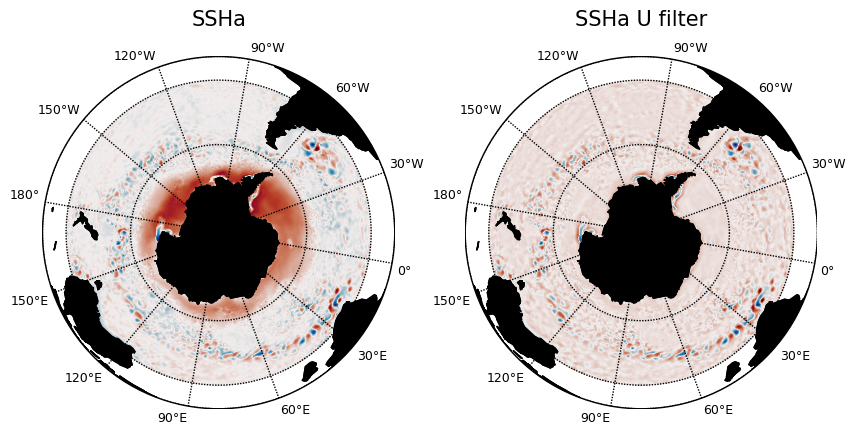

In [7]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
nofilterdata=eta[0,:,:]-ssh_mean
nofilterdata = nofilterdata.filled(fill_value=0)
nofilterdata = nofilterdata - ndimage.uniform_filter(nofilterdata, size=70)
data = ma.masked_array(nofilterdata, mask)
basemap_mplot(lon,lat,[eta[0,:,:]-ssh_mean,data],title=["SSHa","SSHa U filter"],scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=2,yan=1,figsize=(10,5),fontsize=15,dpi=100)

In [8]:
eddytd=analyseddyzt(eta,lon,lat,0,1,1,55,1,1,data_meant=ssh_mean,areamap='',mask=''\
                    #,eccenfit=0.95,gaussrsquarefit=0.8,ellipsrsquarefit=0.85\
                    ,destdir='',physics='',\
                    diagnostics=False,pprint=False)
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-55,-1,-1,data_meant=ssh_mean,areamap='',mask=''\
                     #,eccenfit=0.95,gaussrsquarefit=0.8,ellipsrsquarefit=0.85\
                     ,destdir='',physics='',\
                     diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 213 s  Number of contours analysed: 232 
 0% [>]100% Time Elapsed: 176 s  Number of contours analysed: 625 


In [9]:
eddytduf=analyseddyzt(eta,lon,lat,0,1,1,55,1,1,data_meant=ssh_mean,areamap='',mask=''\
                      #,eccenfit=0.95,gaussrsquarefit=0.8,ellipsrsquarefit=0.85\
                      ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')
eddytdufn=analyseddyzt(eta,lon,lat,0,1,1,-55,-1,-1,data_meant=ssh_mean,areamap='',mask=''\
                     #,eccenfit=0.95,gaussrsquarefit=0.8,ellipsrsquarefit=0.85\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

 0% [>]100% Time Elapsed: 229 s  Number of contours analysed: 918 
 0% [>]100% Time Elapsed: 243 s  Number of contours analysed: 882 


In [10]:
#eddytduf['eddyn_8']
#for keys,items in eddytduf.items():
#    if (items['2dgaussianfit'][0][0]/items['2dgaussianfit'][0][1]+items['2dgaussianfit'][0][1]/items['2dgaussianfit'][0][0])/2 > 1.7:
#        print(keys)
#        print(items['2dgaussianfit'][0][0]/items['2dgaussianfit'][0][1],items['2dgaussianfit'][0][1]/items['2dgaussianfit'][0][0])   

In [11]:
#eddytdgf=analyseddyzt(eta,lon,lat,0,1,1,40,1,10,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='gaussian')
#eddytdgfn=analyseddyzt(eta,lon,lat,0,1,1,-40,-1,-10,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='gaussian')

In [12]:
#eddytd['eddyn_0']['level']=[eddytd['eddyn_0']['level']]

In [13]:
shape_Eta=shape(eta)
del eta

In [14]:
sfield=reconstruct_syntetic(shape_Eta,lon,lat,eddytd)+reconstruct_syntetic(shape_Eta,lon,lat,eddytdn)
del eddytdn, eddytd
#sfieldgf=reconstruct_syntetic(shape_Eta,lon,lat,eddytdgf)+reconstruct_syntetic(shape_Eta,lon,lat,eddytdgfn)
#del eddytdgf, eddytdgfn

In [15]:
sfielduf=reconstruct_syntetic(shape_Eta,lon,lat,eddytduf)+reconstruct_syntetic(shape_Eta,lon,lat,eddytdufn)
del eddytduf, eddytdufn

In [16]:
#sfield[sfield<1]=0
#sfielduf[sfielduf<1]=0

In [17]:
freq=10
hnf=np.histogram(ssha[:,:], bins=arange(-50,50,freq))
hf=np.histogram(data[:,:], bins=arange(-50,50,freq))
hrnf=np.histogram(sfield[0,:,:], bins=arange(-50,50,freq))
hrf=np.histogram(sfielduf[0,:,:], bins=arange(-50,50,freq))
hnf_hrnf=np.histogram(ssha[:,:]-sfield[0,:,:], bins=arange(-50,50,freq))
hf_hrf=np.histogram(data[:,:]-sfielduf[0,:,:], bins=arange(-50,50,freq))

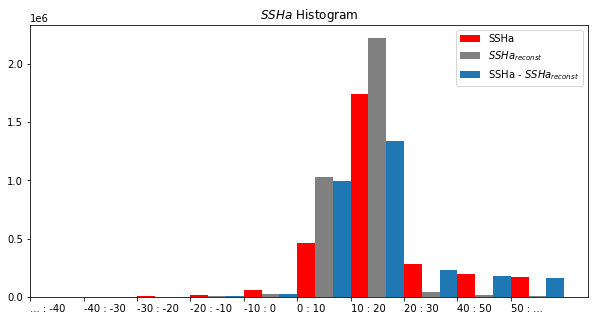

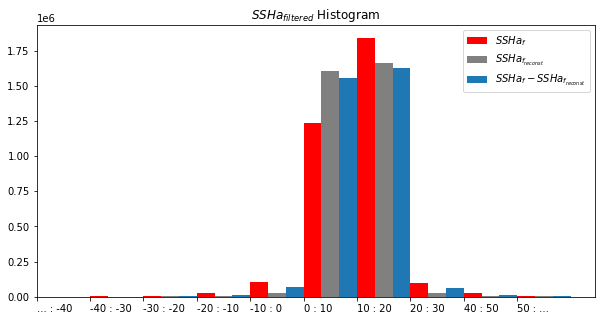

In [18]:
width = freq/3
labels=["... : -40","-40 : -30","-30 : -20","-20 : -10","-10 : 0","0 : 10","10 : 20","20 : 30","40 : 50","50 : ..."]
x=np.arange(-50+freq,50,freq)+width/2
figure(figsize=(10,5))
plt.bar(x,hnf[0],width,color='r',label="SSHa")
plt.bar(x+width,hrnf[0],width,color="gray",label="$SSHa_{reconst}$")
plt.bar(x+2*width,hnf_hrnf[0],width,label="SSHa - $SSHa_{reconst}$")
plt.xticks(np.arange(-50,50, 10.0),labels,ha='left')
plt.title("$SSHa$ Histogram")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.show()
figure(figsize=(10,5))
plt.bar(x,hf[0],width,color='r',label="$SSHa_{f}$")
plt.bar(x+width,hrf[0],width,color="gray",label="$SSHa_{f_{reconst}}$")
plt.bar(x+2*width,hf_hrf[0],width,label="$SSHa_{f} - SSHa_{f_{reconst}}$")
plt.xticks(np.arange(-50,50, 10.0),labels,ha='left')
plt.title("$SSHa_{filtered}$ Histogram")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.show()

# Check why I dont have negative values
# Try a different product from + Aviso 
# Ask Alice about her simulation - Send her a email

In [19]:
len(hnf[0])
len(arange(-45,50,5))

19

In [20]:
# datatest=data*1
# print(shape(datatest))
# pcolormesh(lon,lat,data,vmin=0,vmax=20)
# plot(eddytduf['eddyn_227']['contour'][0][0],eddytduf['eddyn_227']['contour'][0][1],'*r')
# xlim([eddytduf['eddyn_227']['contour'][0][0].min()-0.5,eddytduf['eddyn_227']['contour'][0][0].max()+0.5])
# ylim([eddytduf['eddyn_227']['contour'][0][1].min()-0.5,eddytduf['eddyn_227']['contour'][0][1].max()+0.5])
# show()

# cerolon=nanmean(eddytduf['eddyn_227']['contour'][0][0])
# cerolat=nanmean(eddytduf['eddyn_227']['contour'][0][0])
# minlon=find(lon,eddytduf['eddyn_227']['contour'][0][0].min())
# maxlon=find(lon,eddytduf['eddyn_227']['contour'][0][0].max())
# print(minlon,maxlon)
# datatest[:,:minlon-1]=np.nan
# datatest[:,maxlon+1:]=np.nan
# for ii in range(0,len(eddytduf['eddyn_227']['contour'][0][0])):
    

# pcolormesh(lon,lat,datatest,vmin=0,vmax=20)
# plot(eddytduf['eddyn_227']['contour'][0][0],eddytduf['eddyn_227']['contour'][0][1],'*r')
# xlim([eddytduf['eddyn_227']['contour'][0][0].min()-0.5,eddytduf['eddyn_227']['contour'][0][0].max()+0.5])
# ylim([eddytduf['eddyn_227']['contour'][0][1].min()-0.5,eddytduf['eddyn_227']['contour'][0][1].max()+0.5])  
        

(<matplotlib.figure.Figure at 0x7fe76fb00908>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe76e093a58>,
       dtype=object))

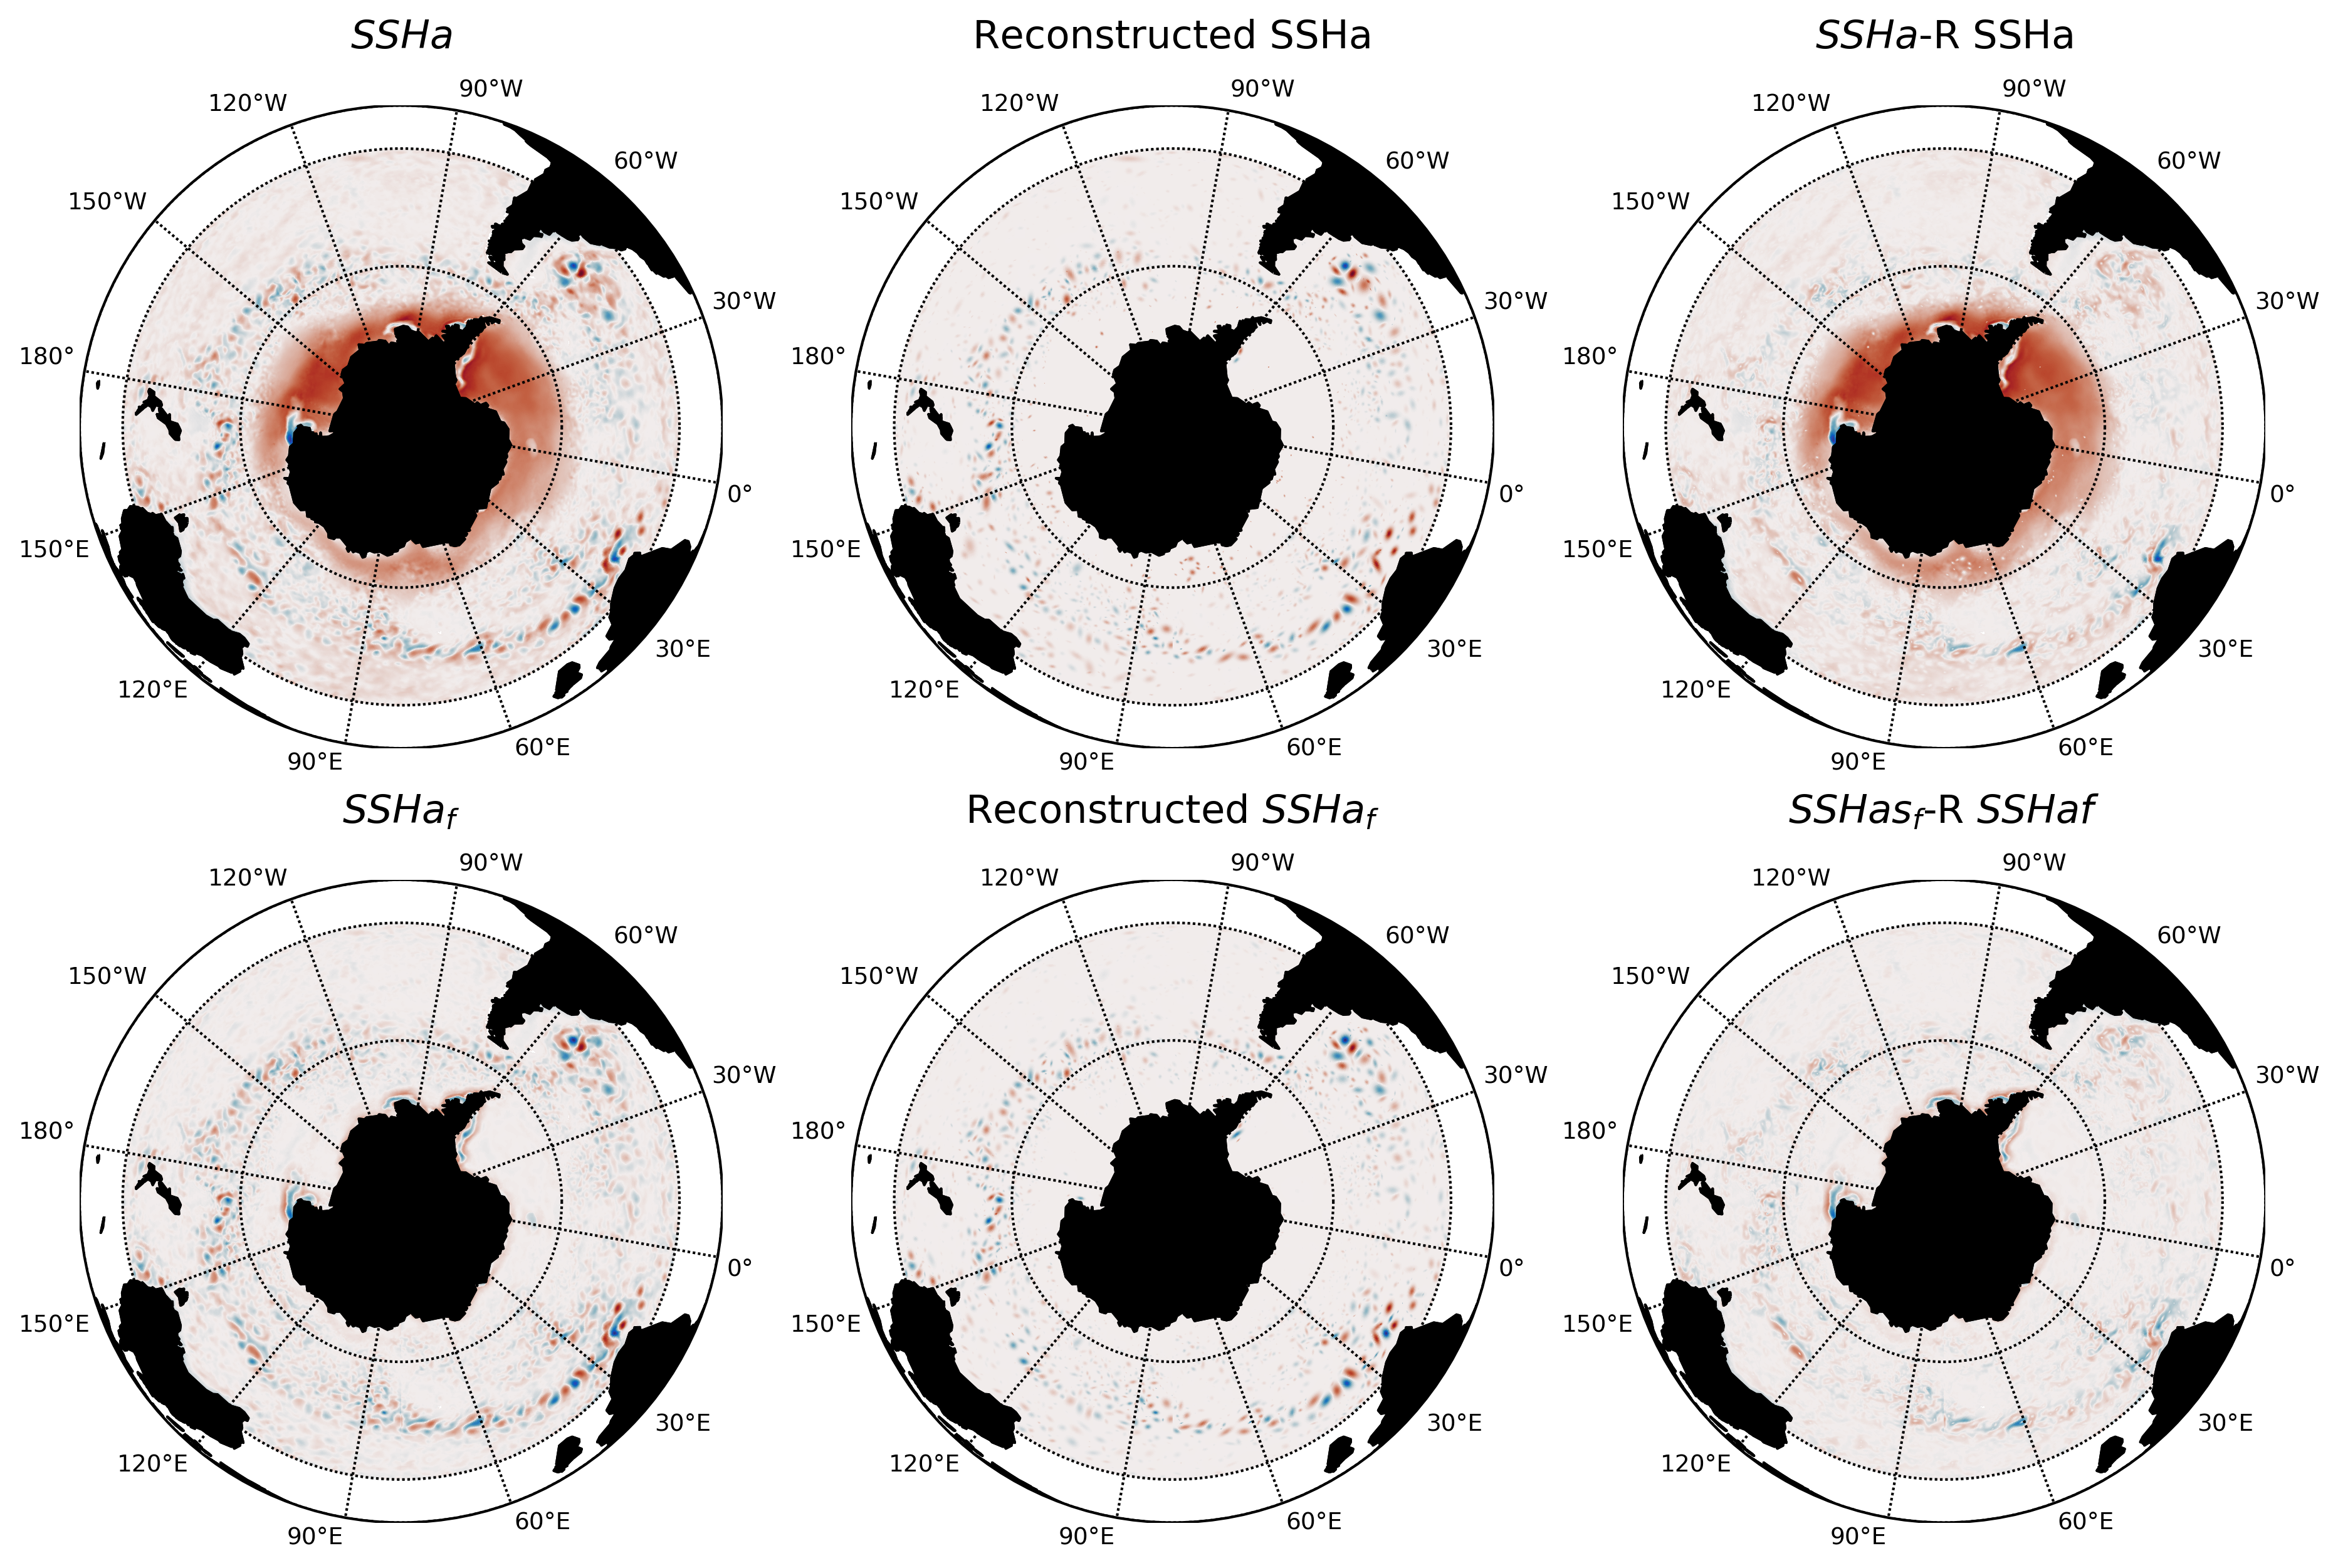

In [21]:
basemap_mplot(lon,lat,[ssha,data[:,:],sfield[0,:,:],sfielduf[0,:,:],ssha-sfield[0,:,:],data[:,:]-sfielduf[0,:,:]]\
              ,title=["$SSHa$","$SSHa_{f}$",r"Reconstructed SSHa","Reconstructed $SSHa_{f}$","$SSHa$-R SSHa","$SSHas_{f}$-R $SSHa{f}$"],scale='Lin',cmap=cm.cm.balance\
              ,vmin=-100,vmax=100,xan=3,yan=2,figsize=(15,10),fontsize=15)
#,sfielduf[0,:,:],data[:,:]-sfielduf[0,:,:]]\

(<matplotlib.figure.Figure at 0x7fe76f37bc50>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe76f8234e0>,
       dtype=object))

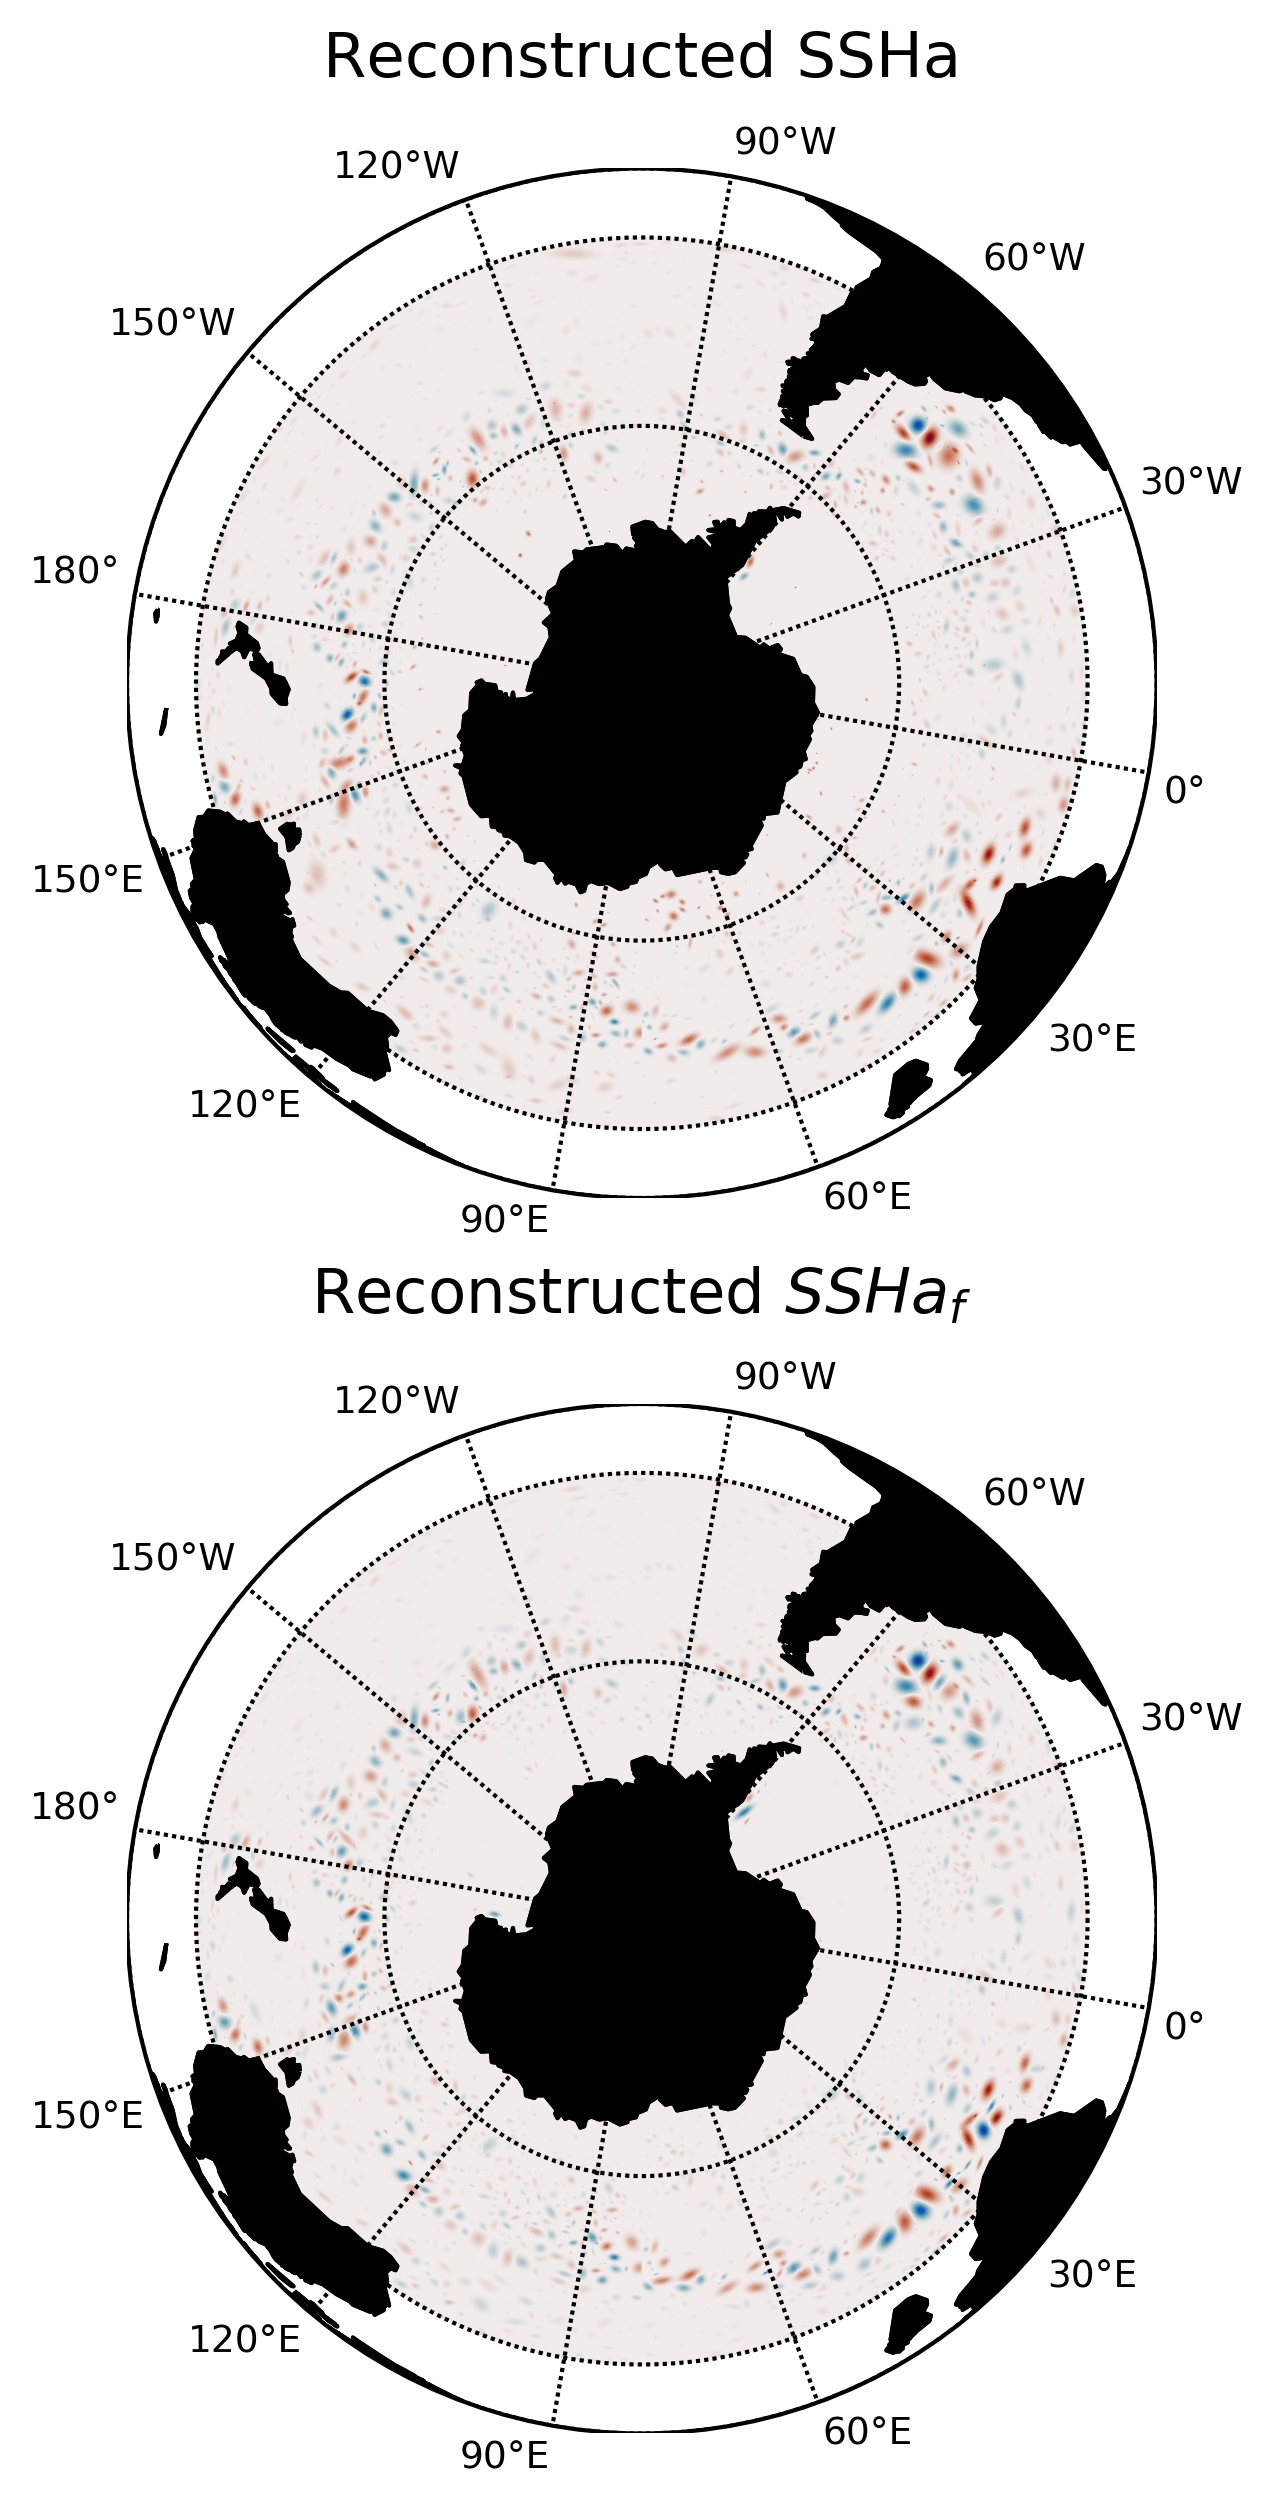

In [22]:
basemap_mplot(lon,lat,[sfield[0,:,:],sfielduf[0,:,:]]\
              ,title=[r"Reconstructed SSHa","Reconstructed $SSHa_{f}$"],scale='Lin',cmap=cm.cm.balance\
              ,vmin=-100,vmax=100,xan=1,yan=2,figsize=(15,10),fontsize=15)
#,sfielduf[0,:,:],data[:,:]-sfielduf[0,:,:]]\

In [23]:
from scipy import signal

In [24]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                    [-10+0j, 0+ 0j, +10 +0j],
                    [ -3+3j, 0+10j,  +3 +3j]])

grad=signal.convolve2d(nofilterdata, scharr, boundary='symm', mode='same')

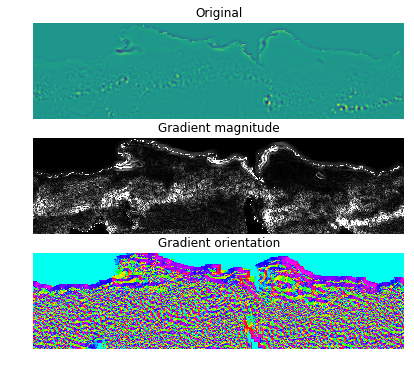

In [25]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(15, 6))
ax_orig.imshow(nofilterdata)
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad),cmap='gray',vmin=0,vmax=100)
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

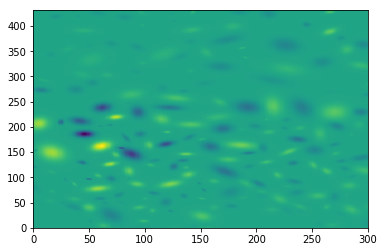

In [26]:
plt.pcolormesh(sfielduf[0,500:1500,0:300])

To do:
    - documentation of parameters
    - change the distance from degrees to km
    - calculate histograms of ssha and reconstruct 
    - Calculate differences in energy 
    - Plot the wavelength
    - Check different datasets
    
Focus on:
    - Documentation
    - Statistics of goodness?
    